In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

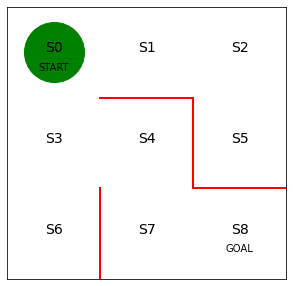

In [2]:
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~7, 열은 행동방향(상,우,하,좌 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, 1, np.nan],       # s0
                    [np.nan, 1, np.nan, 1],       # s1
                    [np.nan, np.nan, 1, 1],       # s2
                    [1, 1, 1, np.nan],            # s3
                    [np.nan, np.nan, 1, 1],       # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],       # s7、※s8은 목표지점이므로 정책이 없다
                    ])

In [43]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :]) # nansum의 경우 nan을 0으로 간주하고 더하는 함수이다. 
    pi = np.nan_to_num(pi) # nan_to_num은 nan을 0으로 변환하는 함수
    
    return pi

In [9]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [15]:
# 1단계 이동 후의 상태 s를 계산하는 함수
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s,;]의 확률에 따라, direction 값이 선택된다

    if next_direction == "up":
        s_next = s - 3  # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        s_next = s + 3  # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return s_next

In [16]:

# 목표 지점에 이를 때까지 에이전트를 계속 이동시키는 함수
def goal_maze(pi):
    s = 0  # 시작 지점
    state_history = [0]  # 에이전트의 경로를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 경로 리스트에 다음 상태(위치)를 추가

        if next_s == 8:  # 목표 지점에 이르면 종료
            break
        else:
            s = next_s

    return state_history

In [22]:
# 목표 지점에 이를 때까지 미로 안을 이동
state_history = goal_maze(pi_0)

In [23]:
print(state_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(state_history) - 1) + "단계입니다")

[0, 3, 6, 3, 4, 7, 4, 3, 0, 3, 4, 3, 6, 3, 6, 3, 4, 7, 4, 3, 6, 3, 4, 7, 8]
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다


In [24]:
# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''배경 이미지 초기화'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''프레임 단위로 이미지 생성'''
    state = state_history[i]  # 현재 위치
    x = (state % 3) + 0.5  # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3)  # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)


# 초기화 함수와 프레임 단위 이미지 생성함수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

# 정책경사 알고리즘

In [25]:
# 정책 파라미터 theta를 행동정책 pi로 변환(소프트맥스 함수 사용)하는 함수
def softmax_convert_into_pi_from_theta(theta):
    '''비율 계산에 소프트맥스 함수 사용'''

    beta = 1.0
    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # theta를 exp(theta)로 변환

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # 단순 비율을 계산하는 코드

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmax로 계산하는 코드

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

In [26]:
# 초기 정책 pi_0을 계산
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [27]:
# 행동 a를 취한 후의 상태 s를 구하는 함수
def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]의 확률을 따라, direction값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return [action, s_next] # action이 취한 행동, s_next가 action을 취한후 state의 위치를 의미함

In [28]:
# 미로를 빠져나오는 함수, 상태와 행동의 히스토리를 출력한다
def goal_maze_ret_s_a(pi):
    s = 0  # 시작 지점
    s_a_history = [[0, np.nan]]  # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 현재 상태(마지막이므로 인덱스가 -1)를 히스토리에 추가

        s_a_history.append([next_s, np.nan])
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 둔다.

        if next_s == 8:  # 목표 지점에 이르면 종료
            break
        else:
            s = next_s

    return s_a_history

In [32]:
# 초기 정책으로 미로를 빠져나오기
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

# 아래의 결과를 설명해보면 처음 0에서 1번 행동을 취해서 상태 1로 이동하였고 상태 1에서 행동 1을 취해서 상태 2로 이동하였다. 상태2에서 행동 2를 취해서 상태 5로 이동하였고 .......

[[0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 1], [4, 3], [3, 1], [4, 2], [7, 0], [4, 2], [7, 0], [4, 2], [7, 0], [4, 3], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 0], [0, 2], [3, 1], [4, 3], [3, 1], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는 48단계입니다


In [37]:
# theta를 수정하는 함수
def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) - 1  # 목표 지점에 이르기까지 걸린 단계 수

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    delta_theta = theta.copy()  # Δtheta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨

    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # theta가 nan이 아닌 경우

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 상태 i에서 행동 j를 취한 경우만 모음

                N_i = len(SA_i)  # 상태 i에서 모든 행동을 취한 횟수
                N_ij = len(SA_ij)  # 상태 i에서 행동 j를 취한 횟수 
                
                # 초판에서 부호 오류가 있었음(수정일 : 1807030
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [38]:
# 정책 수정
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.50104167 0.49895833 0.        ]
 [0.         0.49895833 0.         0.50104167]
 [0.         0.         0.50052083 0.49947917]
 [0.33310081 0.33449162 0.33240757 0.        ]
 [0.         0.         0.50104167 0.49895833]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.50156249 0.49843751 0.         0.        ]]


In [39]:
# 정책 경사 알고리즘으로 미로 빠져나오기
stop_epsilon = 10**-4  # 정책의 변화가 10^-4 보다 작아지면 학습을 종료
theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continue가 False가 될 때까지 반복
    s_a_history = goal_maze_ret_s_a(pi)  # 정책 π를 따라 미로를 탐색한 히스토리를 구함
    new_theta = update_theta(theta, pi, s_a_history)  # 파라미터 Θ를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 정책 π를 수정

    print(np.sum(np.abs(new_pi - pi)))  # 정책의 변화를 출력
    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.023446969141573126
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.011986913243865305
목표 지점에 이르기까지 걸린 단계 수는 46단계입니다
0.011827749345990013
목표 지점에 이르기까지 걸린 단계 수는 46단계입니다
0.048604255428306375
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.009959557342810621
목표 지점에 이르기까지 걸린 단계 수는 48단계입니다
0.016663842872465306
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.024209154145152567
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.005081908528474233
목표 지점에 이르기까지 걸린 단계 수는 52단계입니다
0.007279910697472747
목표 지점에 이르기까지 걸린 단계 수는 76단계입니다
0.018559098487969494
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.015419092415133784
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.010094503201916405
목표 지점에 이르기까지 걸린 단계 수는 114단계입니다
0.0037419911074590417
목표 지점에 이르기까지 걸린 단계 수는 62단계입니다
0.03391912169729311
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.02696427810578067
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.0069209159949710775
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.014268326649132856
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.011989711397756952
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.005382568627026185
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.011690953102504953
목표 지점에 이르기

0.02292998904010829
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.017414462745410197
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.016039212546835768
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.015469374596764285
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01706596907321084
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.018854845659067504
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012968230461636115
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.016720115337024943
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.015151738072635146
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014731935671253443
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.018608892413634587
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.019295382713573672
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.014167867735649348
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.021357160651106905
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.02198920326788925
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.014889599618654603
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01283619393630181
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.017591273814319325
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.021589136223229194
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.016402213206020727
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다

0.009095265239789083
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008989324257298786
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008885021161061393
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0087823268991261
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00868121292730166
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00932348269226023
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014394118968789504
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008277625208558043
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01932419001523382
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008704044754297854
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008604027481524112
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.012412067360984921
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011120738064958682
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008582461272874653
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008230629809078377
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012366930451344169
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.016626358589111073
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.008574343634805817
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00847628041999729
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008379717300645628
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008

0.003877232359324259
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0038443696425094626
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003811904843317074
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0037798318385266066
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.007283104522354367
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003779770496082066
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.010237682442049575
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003766642403276621
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0062557650615516075
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003762782397195727
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003731249830419281
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0037000954246940443
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003669313405873592
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0036388981046526075
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0036088439544077616
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.011591584966191087
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.00840878379382451
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0036006798067462625
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.006776327021027977
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003571143916287836
목표 지점에 이르기까지 걸린 단계 수는

0.0018828856220630616
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001871204288716101
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004636907453652493
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00470215337822745
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007079060125671659
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0019082351573573506
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001896396621459455
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018846657994595548
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004384551045116328
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0044394887433885505
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.02613133903947716
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.001910676977425134
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018988478498155326
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018871258958574819
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018755098467886921
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018639984522802466
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001852590480121874
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018412847159103851
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018300799627487124
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001818975040945664
목표 지점에 이르기까지 걸린 단계 

0.0010469347986007474
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001042000816731857
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010371013315666165
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010322360238591843
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003340818270009163
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003248883237748485
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0010445464788196059
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010396439050054489
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003397220500642603
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001042254462988921
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003905257621055154
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0010525766553047128
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010476073253381964
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010426727887466215
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010377727231366957
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010329068098294605
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003248171128019634
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00392786744706853
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0010537995860807892
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001048806856312156
목표 지점에 이르기까지 걸린 단계 

0.0006293235913883734
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006269848935041324
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006246591477420578
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006223462589553495
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006200461328657869
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006177586760560475
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006154837959578517
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006132214008447399
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006109713998227705
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.002719796868113515
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.000617539972553021
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006152633565128379
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006129992535488654
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006107475724208625
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000608508222715267
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006062811148385555
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004228645711930233
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0006188534983707708
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006165608814769317
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0006142809562550179
목표 지점에 이르기까지 

0.000454998468868803
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00045355510697180773
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.005085511175495605
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002473508862158337
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00046179646607017247
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00046032236384954683
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000458855277351837
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00045739516226657104
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00045594197463082534
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0024112501495301454
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0004603614626326018
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0004588931801237685
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00045743188169430557
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0004559775232506405
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00045453006104615237
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00045308945167744225
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00045165565208124883
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0024844313682053365
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00045690992665950794
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0004554549086746018
목표 

0.00034713029590965547
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00034615931923626456
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003451924151297754
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003442295608031658
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00034327073362776586
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00034231591113510415
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003413650710118246
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003404181911007692
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00033947524939917373
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018094499784956745
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0003421995866992218
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003412504876506156
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00034030533173451394
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003393640971178294
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003384267621211294
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000337493305212367
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003365637050093302
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00033563794027698796
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00033471598992500587
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00466128650442733
목표 지

0.00026800402641254453
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00026734835827562156
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000266695088726069
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00434566155294373
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0002684616202087674
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018727849969206768
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0002718429632234745
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002711736214618121
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002705067438974716
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002698423184530861
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00026918033312780046
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00026852077598953084
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00026786363518310763
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002672088989237216
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00026655655549850943
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002659065932664531
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00026525900065622887
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002646137661677442
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018897176491173596
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0002681491468640024
목표 지점

0.00021580178960276496
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021532717079946959
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002148541147486121
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021438261458965602
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000213912663501915
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002134442547014146
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002129773814405246
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021251203700887317
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002120482147334405
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002115859079774747
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0013572224851583613
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00021333581380145877
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021287020735217752
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021240612045891026
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021194354651799321
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021148247896047266
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021102291125595085
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002105648369056072
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002101082494482074
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00020965314245744923

0.00016581845280916156
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016549838848021851
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001651792490209164
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016486103086789904
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016454373047729634
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016422734432103812
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016391186888804754
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016359730068445967
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001632836362318521
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016297087207164766
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001626590047578199
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001623480308642171
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001620379469786798
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016172874970679478
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016142043566951675
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016111300150440863
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001608064438652565
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016050075942044065
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001601959448561327
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00015989199687221

0.00012988396412591703
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012966222240651248
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012944104683586082
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012922043548956215
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012900038645015377
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012878089781089702
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012856196767035456
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001283435941365485
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012812577532550148
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012790850936128008
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012769179437531475
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012747562850736263
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012726000990449446
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012704493672295938
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012683040712514922
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001266164192813106
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012640297137157287
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012619006158005007
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012597768810224466
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000125765849

0.0001047706780967321
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010461059613760954
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010445087884270593
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010429152510971207
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010413253384048728
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010397390393940102
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010381563431891526
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010365772389137051
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010350017157548762
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001033429762937136
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010318613697142022
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010302965253956159
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010287352193316494
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001027177440884805
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010256231794990821
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010240724246209088
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010225251657615397
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010209813924510168
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010194410942774429
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001017904260

In [40]:
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.015 0.985 0.   ]
 [0.    0.23  0.    0.77 ]
 [0.    0.    0.421 0.579]
 [0.01  0.98  0.01  0.   ]
 [0.    0.    0.984 0.016]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.015 0.985 0.    0.   ]]


In [42]:
# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML

def init():
    # 배경 이미지 초기화
    line.set_data([], [])
    return (line,)

def animate(i):
    # 프레임 단위로 이미지 생성
    state = s_a_history[i][0]  # 현재 위치
    x = (state % 3) + 0.5  # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3)  # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)

#　초기화 함수와 프레임 단위 이미지 생성한수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

# Sarsa 알고리즘 구현 (epsilon-greedy 알고리즘으로 정책 구현)

In [72]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros([m, n])
    for i in range(0, m):
        pi[i,:] = theta[i,:] / np.nansum(theta[i,:])
    pi = np.nan_to_num(pi)
    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [73]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [74]:
# ε-greedy 알고리즘 구현
def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    # 행동을 결정
    if np.random.rand() < epsilon:
        # 확률 ε로 무작위 행동을 선택함
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        # Q값이 최대가 되는 행동을 선택함
        next_direction = direction[np.nanargmax(Q[s, :])]

    # 행동을 인덱스로 변환
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]  # 행동 a의 방향

    # 행동으로 다음 상태를 결정
    if next_direction == "up":
        s_next = s - 3  # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        s_next = s + 3  # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다
    return s_next

In [75]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8: # 목표 지점에 도달한 경우
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else :
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    return Q

In [84]:
# Sarsa 알고리즘으로 미로를 빠져나오는 함수, 상태 및 행동 그리고 Q값의 히스토리를 출력한다
def goal_maze_ret_s_a_Q_S(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi) # 상태 0에서 취할 첫번째 행동
    s_a_history = [[0, np.nan]] # agent의 행동및 상태의 히스토리를 기록하는 리스트
    
    while(1):
        a = a_next # 행동을 결정함
        s_a_history[-1][1] = a # 마지막 상태에서 취한 행동을 저장
        s_next = get_s_next(s, a, Q,epsilon, pi) # 행동에 대한 다음 상태를 구함
        s_a_history.append([s_next, np.nan]) # 다음 상태를 히스토리에 추가, 행동은 모르므로 nan 
        
        if s_next == 8:
            r = 1 # 목표 지점에 도달하면 보상인 1을 부여
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma) # 행동을 취하고 그 행동에 대한 가치함수를 수정한다 (각 episode기준이 아니라 한번 이동할 때마다 수행함)
        if s_next == 8: # 목적이에 도달하면
            break
        else :
            s = s_next
    return [s_a_history, Q] # 이동 기록과 그 때 행동가치함수를 반환함

In [85]:
eta = 0.1 # 학습률
gamma = 0.9 # 시간 할인률
epsilon = 0.5 # ε-greedy 알고리즘 epsilon 초기값
v = np.nanmax(Q, axis = 1)
print(v)
is_continue = True
episode = 1

while is_continue:
    print(f"Episode : {episode:03d}")
    
    # epsilon 값을 조금씩 감소시킴
    epsilon /= 2
    [s_a_history, Q] = goal_maze_ret_s_a_Q_S(Q, epsilon, eta, gamma, pi_0) # Sarsa알고리즘을 빠져 나온 후, 결과를 저장
    new_v = np.nanmax(Q, axis = 1) # 각 상태마다 행동가치의 최댓값ㅇ르 계산
    
    print(np.sum(np.abs(new_v - v))) # 상태가치함수의 변화를 출력 delta(v)
    
    v = new_v
    print(f"목표 지점에 도달하기까지 걸린 단계 수는 {len(s_a_history) - 1} 단계입니다.")
    
    episode += 1
    if episode > 100:
        print(Q)
        break

[0.036 0.073 0.078 0.089 0.083 0.011 0.087 0.067]
Episode : 001
0.22785388838027287
목표 지점에 도달하기까지 걸린 단계 수는 432 단계입니다.
Episode : 002
0.14841672288926266
목표 지점에 도달하기까지 걸린 단계 수는 86 단계입니다.
Episode : 003
0.11903950530351305
목표 지점에 도달하기까지 걸린 단계 수는 64 단계입니다.
Episode : 004
0.10999180493354467
목표 지점에 도달하기까지 걸린 단계 수는 72 단계입니다.
Episode : 005
0.09557692219794424
목표 지점에 도달하기까지 걸린 단계 수는 50 단계입니다.
Episode : 006
0.09079255092937463
목표 지점에 도달하기까지 걸린 단계 수는 4 단계입니다.
Episode : 007
0.08986294295885876
목표 지점에 도달하기까지 걸린 단계 수는 4 단계입니다.
Episode : 008
0.0888856840181256
목표 지점에 도달하기까지 걸린 단계 수는 4 단계입니다.
Episode : 009
0.08785374381417954
목표 지점에 도달하기까지 걸린 단계 수는 4 단계입니다.
Episode : 010
0.0867604024062256
목표 지점에 도달하기까지 걸린 단계 수는 4 단계입니다.
Episode : 011
0.08559983144704664
목표 지점에 도달하기까지 걸린 단계 수는 4 단계입니다.
Episode : 012
0.08436745719296657
목표 지점에 도달하기까지 걸린 단계 수는 4 단계입니다.
Episode : 013
0.08306015716210384
목표 지점에 도달하기까지 걸린 단계 수는 4 단계입니다.
Episode : 014
0.08167633230661973
목표 지점에 도달하기까지 걸린 단계 수는 4 단계입니다.
Episode : 015
0.080215

# Q-learning 알고리즘
- 이는 앞서 본 Sarsa 알고리즘과 비슷하지만 행동가치함수 Q를 수정하는 식만 다르다.
- 시간 할인율과 다음에 취할 행동인 a_t+1을 구해서 행동가치함수를 구했었는데 이 대신 다음 상태에 대한 각 행동가치 함수값중 가장 큰 값을 사용한다는 점이 다르다.

In [94]:
def Q_learning(s, a, r, s_next, Q, eta, gamma):
    if s_next == 8: # 목표 지점에 도달한 경우
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else :
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next,:]) - Q[s, a])
    return Q

In [95]:
# Sarsa 알고리즘으로 미로를 빠져나오는 함수, 상태 및 행동 그리고 Q값의 히스토리를 출력한다
def goal_maze_ret_s_a_Q_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi) # 상태 0에서 취할 첫번째 행동
    s_a_history = [[0, np.nan]] # agent의 행동및 상태의 히스토리를 기록하는 리스트
    
    while(1):
        a = a_next # 행동을 결정함
        s_a_history[-1][1] = a # 마지막 상태에서 취한 행동을 저장
        s_next = get_s_next(s, a, Q,epsilon, pi) # 행동에 대한 다음 상태를 구함
        s_a_history.append([s_next, np.nan]) # 다음 상태를 히스토리에 추가, 행동은 모르므로 nan 
        
        if s_next == 8:
            r = 1 # 목표 지점에 도달하면 보상인 1을 부여
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma) # 행동을 취하고 그 행동에 대한 가치함수를 수정한다 (각 episode기준이 아니라 한번 이동할 때마다 수행함)
        if s_next == 8: # 목적이에 도달하면
            break
        else :
            s = s_next
    return [s_a_history, Q] # 이동 기록과 그 때 행동가치함수를 반환함

In [96]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.1 # 0.1을 곱하는 이유는 애니메이션으로 나타내기 위해서
# * theta_0으로 요소 단위 곱셈을 수행, Q에서 벽으로 이동하는 행동에는 nan을 부여

In [97]:
# Q learning 알고리즘으로 미로 빠져나오기
eta = 0.1 # 학습률
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis = 1) # 각 상태마다 가치의 최댓값을 계산
is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis = 1)) # 상태별로 행동가치의 최댓값을 계산

while is_continue:
    print(f"Episode : {episode:5d}")
    epsilon /= 2
    [s_a_history, Q] = goal_maze_ret_s_a_Q_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis = 1) # 각 상태마다 행동기치의 최댓값을 계산
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)
    
    print(f"목표 지점에 이르기까지 걸린 단계 수는 {len(s_a_history) - 1} 단계입니다.")
    
    episode += 1
    if episode > 100:
        break

Episode :     1
0.07837492771819879
목표 지점에 이르기까지 걸린 단계 수는 54 단계입니다.
Episode :     2
0.24412070247825182
목표 지점에 이르기까지 걸린 단계 수는 420 단계입니다.
Episode :     3
0.09469824637574828
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :     4
0.09313416539099832
목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
Episode :     5
0.09216922136563135
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :     6
0.09123537400628295
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :     7
0.09028782752277889
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :     8
0.0893126553886465
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :     9
0.088296842102752
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :    10
0.08722890255198652
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :    11
0.08609925604337451
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :    12
0.08490041372462784
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :    13
0.08362702677583694
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :    14
0.08227583334944356
목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
Episode :    15
0.08084553445838616
목표 지점에 이르기까지 걸린 단계 수는 4 단계

In [93]:
Vx`

[array([0.099, 0.037, 0.028, 0.086, 0.08 , 0.026, 0.045, 0.046]),
 array([0.068, 0.033, 0.019, 0.087, 0.076, 0.024, 0.045, 0.142]),
 array([0.058, 0.038, 0.02 , 0.058, 0.081, 0.024, 0.049, 0.228]),
 array([0.048, 0.042, 0.02 , 0.048, 0.094, 0.024, 0.049, 0.305]),
 array([0.039, 0.039, 0.02 , 0.043, 0.112, 0.024, 0.04 , 0.374]),
 array([0.039, 0.039, 0.02 , 0.048, 0.134, 0.024, 0.04 , 0.437]),
 array([0.039, 0.039, 0.02 , 0.056, 0.16 , 0.024, 0.04 , 0.493]),
 array([0.041, 0.039, 0.02 , 0.064, 0.189, 0.024, 0.04 , 0.544]),
 array([0.042, 0.039, 0.02 , 0.075, 0.219, 0.024, 0.04 , 0.589]),
 array([0.045, 0.039, 0.02 , 0.087, 0.25 , 0.024, 0.04 , 0.631]),
 array([0.048, 0.039, 0.02 , 0.101, 0.282, 0.024, 0.04 , 0.667]),
 array([0.052, 0.039, 0.02 , 0.116, 0.314, 0.024, 0.04 , 0.701]),
 array([0.058, 0.039, 0.02 , 0.133, 0.345, 0.024, 0.04 , 0.731]),
 array([0.064, 0.039, 0.02 , 0.151, 0.376, 0.024, 0.04 , 0.758]),
 array([0.071, 0.039, 0.02 , 0.169, 0.407, 0.024, 0.04 , 0.782]),
 array([0.

In [98]:

# 상태가치의 변화를 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm  # color map


def init():
    # 배경색 초기화
    line.set_data([], [])
    return (line,)


def animate(i):
    # 프레임 단위로 그림을 그림
    # 각 칸에 상태가치 값으로 결정된 색을 칠함
    line, = ax.plot([0.5], [2.5], marker="s",
                    color=cm.jet(V[i][0]), markersize=85)  # S0
    line, = ax.plot([1.5], [2.5], marker="s",
                    color=cm.jet(V[i][1]), markersize=85)  # S1
    line, = ax.plot([2.5], [2.5], marker="s",
                    color=cm.jet(V[i][2]), markersize=85)  # S2
    line, = ax.plot([0.5], [1.5], marker="s",
                    color=cm.jet(V[i][3]), markersize=85)  # S3
    line, = ax.plot([1.5], [1.5], marker="s",
                    color=cm.jet(V[i][4]), markersize=85)  # S4
    line, = ax.plot([2.5], [1.5], marker="s",
                    color=cm.jet(V[i][5]), markersize=85)  # S5
    line, = ax.plot([0.5], [0.5], marker="s",
                    color=cm.jet(V[i][6]), markersize=85)  # S6
    line, = ax.plot([1.5], [0.5], marker="s",
                    color=cm.jet(V[i][7]), markersize=85)  # S7
    line, = ax.plot([2.5], [0.5], marker="s",
                    color=cm.jet(1.0), markersize=85)  # S8
    return (line,)


# 초기화 함수와 프레임 단위로 그림을 그리는 함수로 애니메이션을 생성
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())

# 아래의 애니메이션에서 올라갈수록 붉은 색으로 변하지 않는 이유는 시간 할인율에 의해 가치가 할인되기 때문이다.
# 이 그림에서 중요한 점 
# 1. 보상을 받게 되는 지점인 목표 지점부터 거슬러 올라가면서 상태가치가 학습되는 양상을 보인다.
# 2. 학습 이후에는 시작지점부터 목표 지점까지 가는 경로가 형성된다는 점이다.